#Machine learning classifiers with wiiiiine

In [82]:
import pandas as pd
import pylab
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [19]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", names = ["Wine", "Alcohol","Malic acid","Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids","Nonflavanoid phenols", "Proanthocyanins","Color intensity", "Hue", "OD280/OD315 of diluted wines","Proline" ])



In [73]:
print data.shape
data.head()

(178, 14)


,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


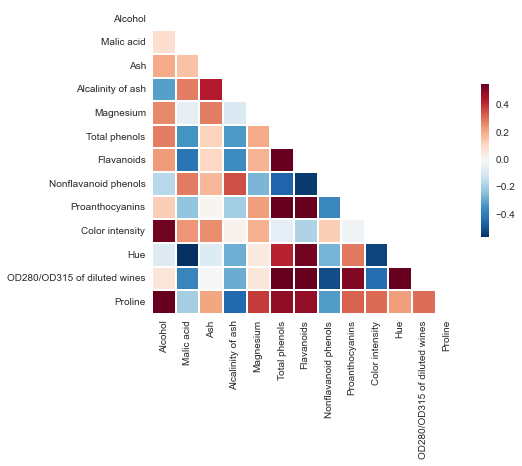

In [35]:
sns.set(style="white")
corr = data.iloc[:,1:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, vmax=.3, mask = mask,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5})

In [195]:
def plot(x,y):
    sns.set(style="whitegrid")
    
    cmap_bold = ListedColormap([sns.crayons['Green'],sns.crayons['Blue'],sns.crayons['Red']])
    plt.scatter(data[x], data[y], c = data["Wine"], cmap = cmap_bold)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

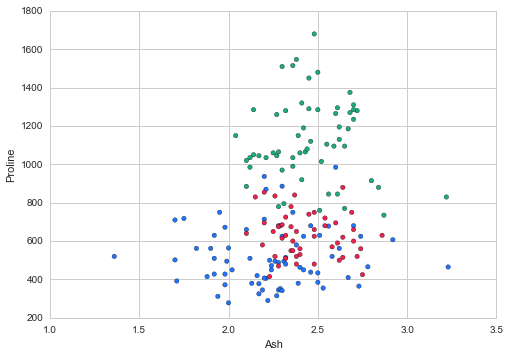

In [196]:
plot('Ash','Proline')

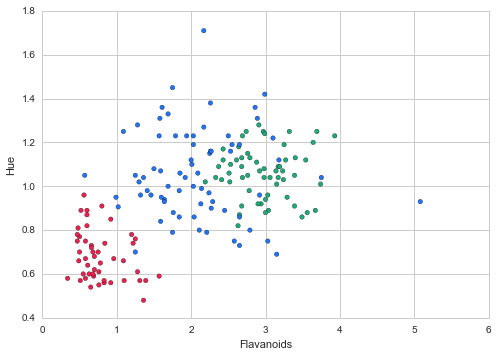

In [197]:
plot('Flavanoids','Hue')

###k-nearest neighbours

In [47]:
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import neighbors


In [41]:
X = data.iloc[:,1:].astype(float)
y = data.iloc[:,0].astype(float)

In [42]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [53]:
X_scaled = preprocessing.scale(X)

In [55]:
X_scaled = pd.DataFrame(X_scaled)

In [57]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [58]:
nbrs =  neighbors.NearestNeighbors(n_neighbors=3,algorithm="ball_tree").fit(X_scaled)
dist,indexes = nbrs.kneighbors(X_scaled)

generate confusion matrix for 15 neighbours, using default distance weighting

In [106]:
#get training and testing data set
XTrain, XTest, yTrain, yTest = train_test_split(X_scaled, y)
knn = neighbors.KNeighborsClassifier(n_neighbors=15) #, weights="distance"
knn = knn.fit(XTrain,yTrain)
prediction = knn.predict(XTest)

ConfusionMatrix =  metrics.confusion_matrix(yTest,prediction)
print ConfusionMatrix
print metrics.classification_report(yTest,prediction)
print("Accuracy: %.3f" % (metrics.accuracy_score(yTest,prediction)))

[[10  0  0]
 [ 1 15  1]
 [ 0  0 18]]
             precision    recall  f1-score   support

        1.0       0.91      1.00      0.95        10
        2.0       1.00      0.88      0.94        17
        3.0       0.95      1.00      0.97        18

avg / total       0.96      0.96      0.95        45

Accuracy: 0.956


generate matrix when there are 50 neighbours

In [74]:
knn = neighbors.KNeighborsClassifier(n_neighbors=50) #, weights="distance"
knn = knn.fit(XTrain,yTrain)
prediction = knn.predict(XTest)

ConfusionMatrix =  metrics.confusion_matrix(yTest,prediction)
print ConfusionMatrix
print metrics.classification_report(yTest,prediction)
print("Accuracy: %.3f" % (metrics.accuracy_score(yTest,prediction)))

[[19  0  0]
 [ 1 18  1]
 [ 0  0  6]]
             precision    recall  f1-score   support

        1.0       0.95      1.00      0.97        19
        2.0       1.00      0.90      0.95        20
        3.0       0.86      1.00      0.92         6

avg / total       0.96      0.96      0.96        45

Accuracy: 0.956


what about when there are just 3 neighbours?

In [75]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3) #, weights="distance"
knn = knn.fit(XTrain,yTrain)
prediction = knn.predict(XTest)

ConfusionMatrix =  metrics.confusion_matrix(yTest,prediction)
print ConfusionMatrix
print metrics.classification_report(yTest,prediction)
print("Accuracy: %.3f" % (metrics.accuracy_score(yTest,prediction)))

[[19  0  0]
 [ 0 19  1]
 [ 0  0  6]]
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        19
        2.0       1.00      0.95      0.97        20
        3.0       0.86      1.00      0.92         6

avg / total       0.98      0.98      0.98        45

Accuracy: 0.978


1 neighbour???

In [76]:
knn = neighbors.KNeighborsClassifier(n_neighbors) #, weights="distance"
knn = knn.fit(XTrain,yTrain)
prediction = knn.predict(XTest)

ConfusionMatrix =  metrics.confusion_matrix(yTest,prediction)
print ConfusionMatrix
print metrics.classification_report(yTest,prediction)
print("Accuracy: %.3f" % (metrics.accuracy_score(yTest,prediction)))

[[19  0  0]
 [ 1 18  1]
 [ 0  0  6]]
             precision    recall  f1-score   support

        1.0       0.95      1.00      0.97        19
        2.0       1.00      0.90      0.95        20
        3.0       0.86      1.00      0.92         6

avg / total       0.96      0.96      0.96        45

Accuracy: 0.956


In [79]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 10, weights = 'uniform') #, weights="distance"
knn = knn.fit(XTrain,yTrain)
prediction = knn.predict(XTest)

ConfusionMatrix =  metrics.confusion_matrix(yTest,prediction)
print ConfusionMatrix
print metrics.classification_report(yTest,prediction)
print("Accuracy: %.3f" % (metrics.accuracy_score(yTest,prediction)))

[[19  0  0]
 [ 0 19  1]
 [ 0  0  6]]
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        19
        2.0       1.00      0.95      0.97        20
        3.0       0.86      1.00      0.92         6

avg / total       0.98      0.98      0.98        45

Accuracy: 0.978


In [87]:
def plotvector(XTrain, yTrain, XTest, yTest, weights, upperLim = 310):
    results = []
    for n in range(1, upperLim, 4):
        clf = neighbors.KNeighborsClassifier(n_neighbors = n, weights = weights)
        clf = clf.fit(XTrain, yTrain)
        preds = clf.predict(XTest)
        accuracy = clf.score(XTest, yTest)
        results.append([n, accuracy])
    results = np.array(results)
    return(results)

def plotaccuracy(XTrain, yTrain, XTest, yTest, upperLim):
    pltvector1 = plotvector(XTrain, yTrain, XTest, yTest, weights = "uniform", upperLim=upperLim)
    pltvector2 = plotvector(XTrain, yTrain, XTest, yTest, weights = "distance", upperLim=upperLim)
    line1 = plt.plot(pltvector1[:,0], pltvector1[:,1], label = "uniform")
    line2 = plt.plot(pltvector2[:,0], pltvector2[:,1],  label = "distance")
    plt.legend(loc=3)
    plt.ylim(0.5, 1)
    plt.title("Accuracy with Increasing K")
    plt.show()
    


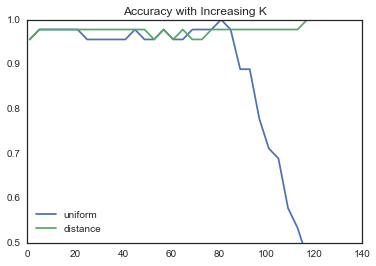

In [89]:
plotaccuracy(XTrain, yTrain, XTest, yTest, 130)

In [209]:
from matplotlib.colors import ListedColormap
def decisionplot(XTrain, yTrain, n_neighbors, weights):
    h = .02  # step size in the mesh
    Xtrain = XTrain[:, :2] # we only take the first two features.
    # Create color maps
    cmap_bold = ListedColormap([sns.crayons['Green'],sns.crayons['Blue'],sns.crayons['Red']])
    cmap_light = ListedColormap([sns.crayons['Granny Smith Apple'],sns.crayons['Sky Blue'],sns.crayons['Pink Sherbert']])
    
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(Xtrain, yTrain)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
    y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),  np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
    # Plot also the training points
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c = yTrain, cmap = cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.show()

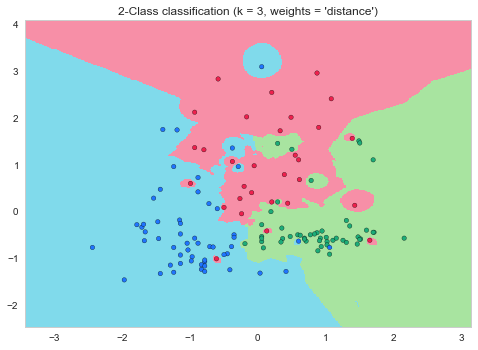

In [210]:
decisionplot(np.array(XTrain), yTrain, n_neighbors=3, weights="distance")

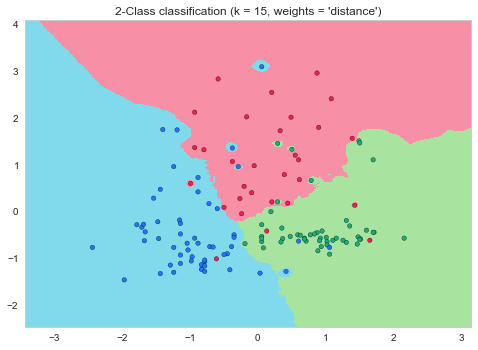

In [204]:
decisionplot(np.array(XTrain), yTrain, n_neighbors=15, weights="distance")

#Logistic regression
Let's try that again using logistic regression

In [109]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(XTrain, yTrain)
logit_prediction = logreg.predict(XTest)

In [112]:
ConfusionMatrix =  metrics.confusion_matrix(yTest,logit_prediction)
print ConfusionMatrix
print metrics.classification_report(yTest,logit_prediction)
print("Accuracy: %.3f" % (metrics.accuracy_score(yTest,logit_prediction)))

[[10  0  0]
 [ 0 16  1]
 [ 0  0 18]]
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        10
        2.0       1.00      0.94      0.97        17
        3.0       0.95      1.00      0.97        18

avg / total       0.98      0.98      0.98        45

Accuracy: 0.978


In [211]:
def logit_decisionplot(XTrain, yTrain, XTest, yTest, column1, column2):
    h = .02  # step size in the mesh
    columns = X.columns
    XTrain = np.array(XTrain)[:, [column1,column2]] 
    XTest = np.array(XTest)[:, [column1,column2]]
    # Create color maps
    cmap_bold = ListedColormap([sns.crayons['Green'],sns.crayons['Blue'],sns.crayons['Red']])
    cmap_light = ListedColormap([sns.crayons['Granny Smith Apple'],sns.crayons['Sky Blue'],sns.crayons['Pink Sherbert']])
    logreg = linear_model.LogisticRegression()
    logreg = logreg.fit(XTrain, yTrain)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = XTrain[:, 0].min() - 1, XTrain[:, 0].max() + 1
    y_min, y_max = XTrain[:, 1].min() - 1, XTrain[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),  np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
    # Plot also the training points
    plt.scatter(XTrain[:, 0], XTrain[:, 1], c = yTrain, cmap = cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(str(columns[column1]))
    plt.ylabel(str(columns[column2]))
    plt.title("Logistic classification")
    plt.show()
    
    logit_prediction = logreg.predict(XTest)
    print("Accuracy: %.3f" % (metrics.accuracy_score(yTest,logit_prediction)))

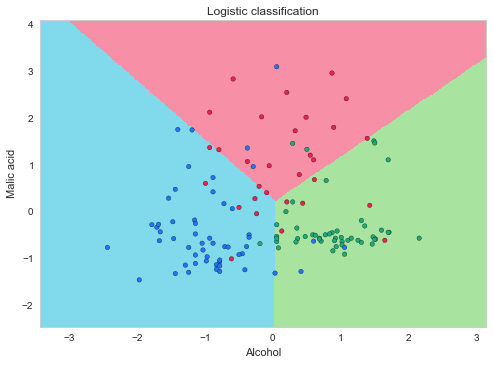

Accuracy: 0.689


In [212]:
logit_decisionplot(XTrain, yTrain,XTest, yTest, 0, 1)

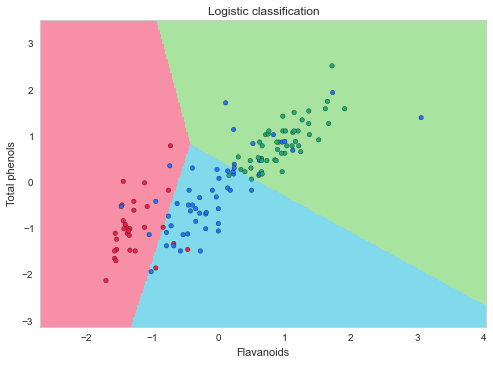

Accuracy: 0.711


In [213]:
logit_decisionplot(XTrain, yTrain,XTest, yTest, 6, 5)

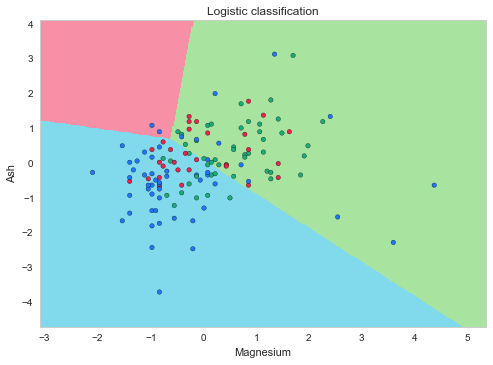

Accuracy: 0.422


In [214]:
logit_decisionplot(XTrain, yTrain,XTest, yTest, 4,2)

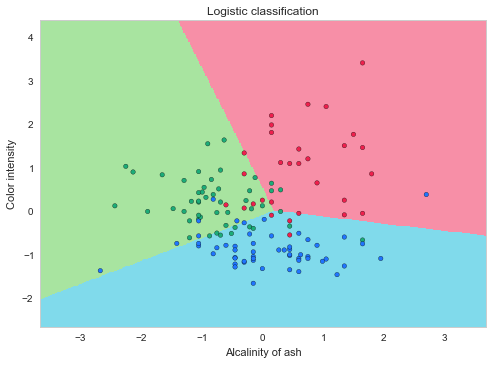

Accuracy: 0.778


In [215]:
logit_decisionplot(XTrain, yTrain,XTest, yTest, 3,9)